In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/amazon.csv')

# Display column names and the first few rows of the dataframe
print(df.columns)
print(df.head())



Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Co

In [8]:
print(df.columns)

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [9]:
#Q1- What is the average rating for each product category


# Convert the 'rating' column to numeric, coercing errors to NaN (for invalid values)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by category and calculate the average rating
average_ratings = df.groupby('category')['rating'].mean()

# Display the result
print(average_ratings)




category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [10]:
#Q2 What are the top rating_count products by category

# Convert 'rating_count' to numeric, coercing errors to NaN (for invalid values)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Sort within each category by 'rating_count' in descending order
top_products = df.sort_values(by=['category', 'rating_count'], ascending=[True, False])

# For each category, take the top product (or products) based on rating_count
top_products_by_category = top_products.groupby('category').head(1)

# Display the result
print(top_products_by_category[['category', 'product_name', 'rating_count']])


                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...           NaN  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...           NaN  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...           NaN  
748

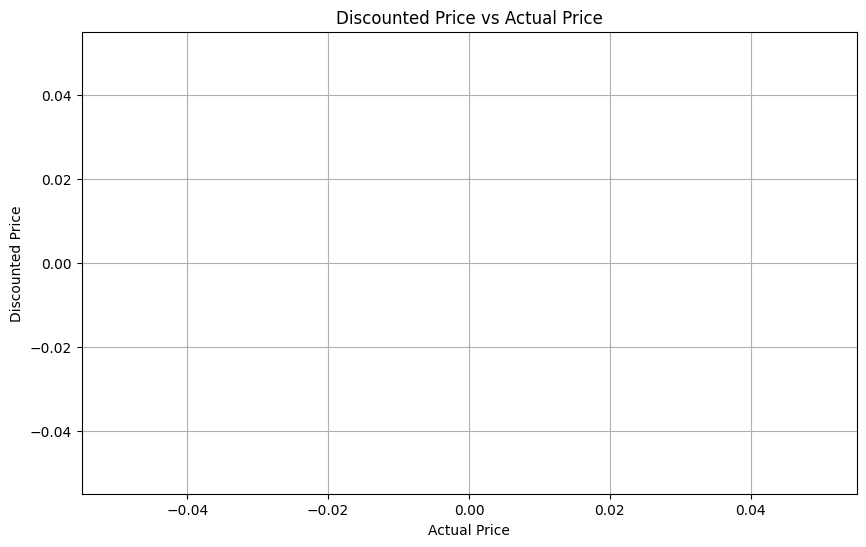

In [14]:
#Q3 What is the distribution of discounted prices vs. actual prices
import pandas as pd
import matplotlib.pyplot as plt


# Convert price columns to numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Drop rows with missing prices
df = df.dropna(subset=['discounted_price', 'actual_price'])

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['actual_price'], df['discounted_price'], alpha=0.5, color='teal')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.title('Discounted Price vs Actual Price')
plt.grid(True)
plt.show()



In [16]:
#Q4-How does the average discount percentage vary across categories
import pandas as pd

# Load the CSV
df = pd.read_csv('/content/drive/MyDrive/amazon.csv')

# Convert 'discount_percentage' to numeric (in case of any strings or symbols)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Group by category and calculate average discount percentage
avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

# Display the result
print(avg_discount)



category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPen

In [17]:
#Q5-What are the most popular product names

# Convert rating_count to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Drop missing values in rating_count
df = df.dropna(subset=['rating_count'])

# Sort by rating_count in descending order
most_popular = df.sort_values(by='rating_count', ascending=False)

# Get the top 10 product names
top_10_products = most_popular[['product_name', 'rating_count']].head(10)

print(top_10_products)


                                           product_name  rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
151   Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...         959.0
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...         942.0
214   Crypo™ Universal Remote Compatible with Tata S...         928.0
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...         925.0


In [18]:
#Q6 What are the most popular product keywords

import pandas as pd
from collections import Counter
import re


# Combine all product names into a single string
all_names = ' '.join(df['product_name'].dropna().astype(str))

# Optional: make lowercase and split words using regex (to avoid punctuation)
words = re.findall(r'\b\w+\b', all_names.lower())

# Count word frequency
word_counts = Counter(words)

# Get the top 20 most common keywords
most_common_keywords = word_counts.most_common(20)

# Display the keywords
for word, count in most_common_keywords:
    print(f"{word}: {count}")


for: 204
with: 154
cable: 116
1: 101
black: 97
c: 89
and: 85
usb: 82
remote: 69
compatible: 66
tv: 61
to: 59
type: 59
heater: 59
charging: 57
fast: 54
3: 53
2: 49
electric: 47
smart: 45


In [19]:
#Q7 What are the most popular product reviews
# Convert 'rating_count' to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Drop NaN values
df = df.dropna(subset=['rating_count', 'review_title', 'review_content'])

# Sort by rating_count
top_reviews = df.sort_values(by='rating_count', ascending=False)

# Select top 10 most popular reviews
top_10_reviews = top_reviews[['product_name', 'rating_count', 'review_title', 'review_content']].head(10)

# Display
print(top_10_reviews)


                                           product_name  rating_count  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0   
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0   
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0   
151   Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0   
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...         959.0   
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...         942.0   
214   Crypo™ Universal Remote Compatible with Tata S...         928.0   
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...         925.0   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
1059  Kettle is goo

In [20]:
#Q8-What is the correlation between discounted_price and rating

# Convert to numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop NaN values
df_clean = df.dropna(subset=['discounted_price', 'rating'])

# Calculate correlation
correlation = df_clean['discounted_price'].corr(df_clean['rating'])

print(f"Correlation between discounted price and rating: {correlation:.4f}")


Correlation between discounted price and rating: nan


In [21]:
#Q9- What are the Top 5 categories based on the highest rating

# Convert 'rating' to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop NaNs in 'rating' or 'category'
df = df.dropna(subset=['rating', 'category'])

# Group by category and calculate average rating
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

# Display the result
print("Top 5 Categories Based on Highest Average Rating:")
print(top_categories)


Top 5 Categories Based on Highest Average Rating:
category
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice                   5.00
Electronics|Mobiles&Accessories|MobileAccessories|Photo&VideoAccessories|SelfieSticks            4.60
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                     4.50
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterFilters&Purifiers            4.45
Electronics|Mobiles&Accessories|MobileAccessories|Maintenance,Upkeep&Repairs|ScreenProtectors    4.40
Name: rating, dtype: float64


In [22]:
#Q10- Identify any potential areas for improvement or optimization based on the data analysi

import pandas as pd
from collections import Counter
import re

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/amazon.csv')

# Convert relevant columns to numeric
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# 1. Low-Rated Categories
low_rated_categories = df.groupby('category')['rating'].mean().sort_values().head(5)
print("\nLowest Rated Categories:\n", low_rated_categories)

# 2. High Discount, Low Rating Products
low_quality_discounts = df[(df['discount_percentage'] > 40) & (df['rating'] < 3.0)]
print("\nProducts with High Discounts but Low Ratings:\n", low_quality_discounts[['product_name', 'discount_percentage', 'rating']].head(10))

# 3. Popular but Poorly Rated Products
popular_low_rated = df[(df['rating_count'] > 100) & (df['rating'] < 3.0)]
print("\nPopular but Low-Rated Products:\n", popular_low_rated[['product_name', 'rating', 'rating_count']].head(10))

# 4. Missing or Dirty Data Check
missing_data = df.isnull().sum()
print("\nMissing Data:\n", missing_data)

# 5. Underperforming Product Keywords (Low-Rated Products)
low_rated = df[df['rating'] < 3.0]['product_name'].dropna().astype(str)
text = ' '.join(low_rated)
keywords = re.findall(r'\b\w+\b', text.lower())

# Count and display common keywords
low_rating_keywords = Counter(keywords).most_common(15)
print("\nCommon Keywords in Low-Rated Products:")
for word, count in low_rating_keywords:
    print(f"{word}: {count}")

# 6. Correlation Between Discounted Price and Rating
correlation = df[['discounted_price', 'rating']].corr()
print("\nCorrelation Between Discounted Price and Rating:\n", correlation)



Lowest Rated Categories:
 category
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeeGrinders|ElectricGrinders                          3.3
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    3.4
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                  3.5
Computers&Accessories|Printers,Inks&Accessories|Printers|InkjetPrinters                                          3.6
Name: rating, dtype: float64

Products with High Discounts but Low Ratings:
 Empty DataFrame
Columns: [product_name, discount_percentage, rating]
Index: []

Popular but Low-Rated Products:
                                            product_name  rating  rating_count
1286  MR. BRAND Portable USB Juicer Electric USB Jui...     2.8         109.0
1449  IONIX Tap filter Multilayer